In [2]:
import pandas as pd 
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("titanic.csv")
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [6]:
print(df.isnull().sum()) #FOR THE MESSING VALUES

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


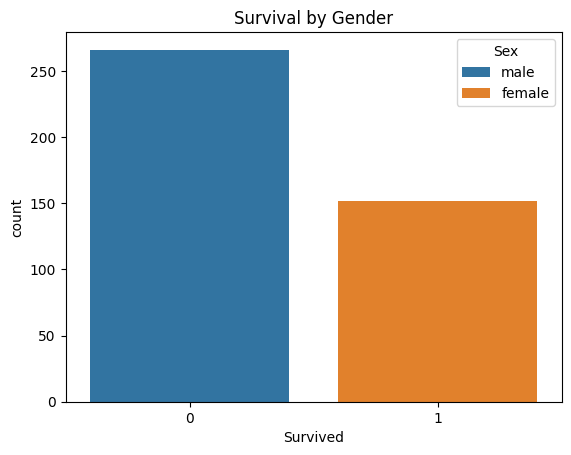

In [7]:
#VISUALIZE SURVAVAL BY GENDER
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by Gender")
plt.show()

In [8]:
#DATA CLEANING 
# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [9]:
#Filling missing ages with median
df["Age"].fillna(df["Age"].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17252\2734530755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [10]:
#CONVERT GENDER and Embarked
df["Sex"] = df["Sex"].map({"Male":1, "Femal":0})
df["Embarked"] = df["Embarked"].map({"S":0})

In [11]:
print(df.isnull().sum()) #CHECK VALUES

Survived      0
Pclass        0
Sex         418
Age           0
SibSp         0
Parch         0
Fare          1
Embarked    148
dtype: int64


In [12]:
# Features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")  # Aim for >80%

Model Accuracy: 0.55


In [13]:
print(X_train.dtypes)

Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object
